In [52]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [3]:
df=pd.read_csv(r'bank.csv')

In [5]:
Bank_df=df.copy()

In [45]:
Bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [44]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int32
 2   marital    11162 non-null  int32
 3   education  11162 non-null  int32
 4   default    11162 non-null  int32
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int32
 7   loan       11162 non-null  int32
 8   contact    11162 non-null  int32
 9   day        11162 non-null  int64
 10  month      11162 non-null  int32
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int32
 16  deposit    11162 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 1.0 MB


In [43]:
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
for i in Bank_df.columns:
    if Bank_df[str(i)].dtype == 'O':
        Bank_df[str(i)]=labelenc.fit_transform(Bank_df[str(i)])

In [10]:
Bank_df['deposit'].value_counts()#0 is yes and 1 is no

deposit
0    5873
1    5289
Name: count, dtype: int64

In [41]:
Bank_df['month'].dtype=='O'

True

In [14]:
import xgboost as xgb


In [18]:
#import sklearn
#print(sklearn.__version__)


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,fbeta_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [46]:
Bank_df1=Bank_df.copy()
X=Bank_df1.drop('deposit',axis=1)
y=Bank_df['deposit']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
pipeline=Pipeline([('classifier',XGBClassifier())])
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}
grid_search=GridSearchCV(pipeline,param_grid,cv=5)
grid_search.fit(X_train,y_train)
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(grid_search.best_params_)




              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1166
           1       0.82      0.87      0.84      1067

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233

Confusion Matrix:
[[967 199]
 [142 925]]
Best Hyperparameters:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}


In [48]:
XGBClassifier?

<IPython.core.display.Javascript object>


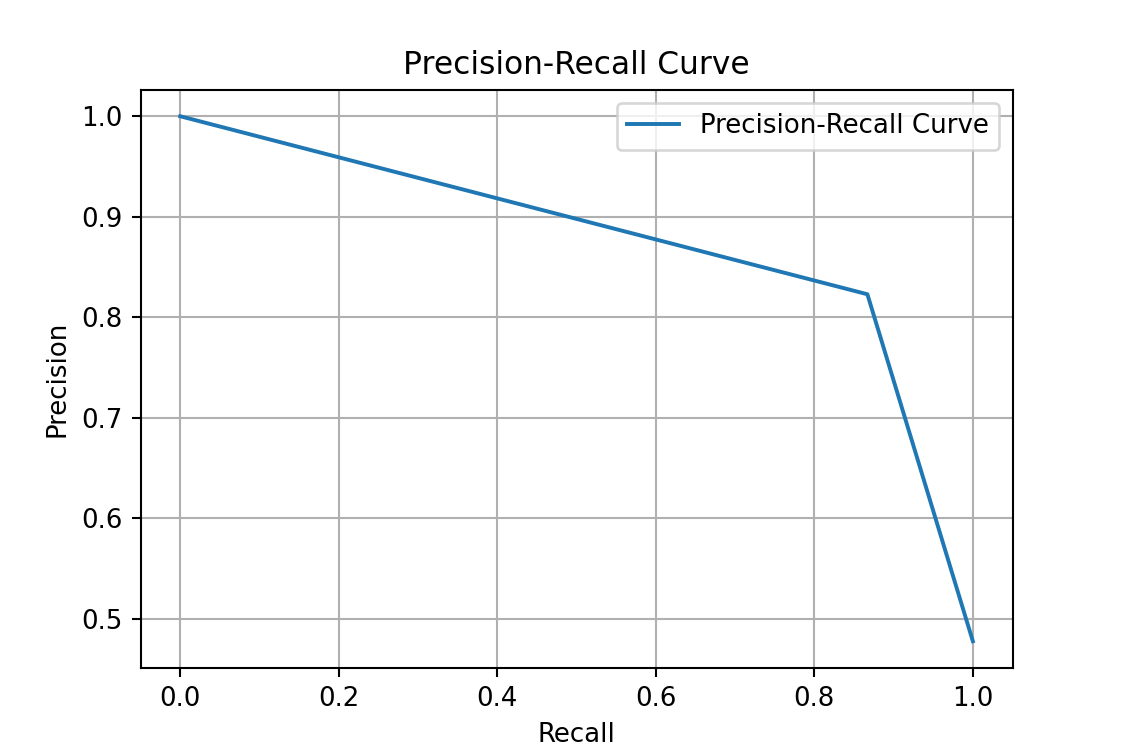

In [55]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_scores contains the predicted scores or probabilities
# Replace y_true and y_scores with your actual data
y_true = y_test
y_scores = y_pred

# Calculate precision and recall values using precision_recall_curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
